<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import misc
import scipy
from PIL import Image as pimg
from PIL.ExifTags import TAGS
from sympy import Matrix
from skimage import io,color, img_as_ubyte,img_as_float
import skimage
%matplotlib inline

In [2]:
plt.rcParams['image.cmap']='gray'

# Definition
A digital image	is	defined	by integrating and sampling	continuous (analog)	data in	a spatial domain.

An image contain a contniuum of intensity values before it is quantized to obtain a digital image

# IMAGES AS NUMPY ARRAY
 a grayscale image as a 2D array:

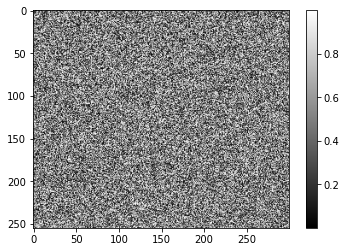

In [3]:
random_gray=np.random.random([255,300])
plt.imshow(random_gray)
plt.colorbar()

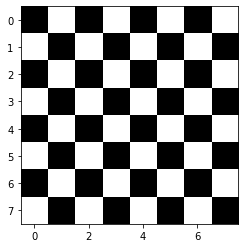

In [4]:
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1
plt.imshow(check)

In [5]:
check

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

# Basic Operations on Images

# Accessing and Modifying pixel values

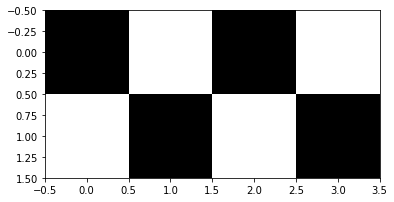

In [6]:

ck = np.zeros((2, 4))
ck[::2,1::2]=1
ck[1::2,::2]=1
ck
plt.imshow(ck)

In [7]:
# row 1 column 0
print(ck[1,0])


1.0


# modifying image pixels

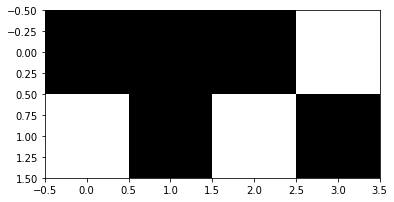

In [8]:
cm_ck=ck.copy()
cm_ck[0,1]=0
plt.imshow(cm_ck,cmap='gray')

**Meta Data of the image**

In [19]:
def MetaData(img_path):
    img=pimg.open(img_path)
    info=img.getexif()
    meta_table={}
    for tag,value in info.items():
        decoded=TAGS.get(tag,tag)
        meta_table[decoded]=value
    return meta_table
    

In [20]:
path='../images/car.jpg'
MetaData(path)

{'GPSInfo': 9186,
 'ResolutionUnit': 2,
 'ExifOffset': 360,
 'Make': 'Canon',
 'Model': 'Canon EOS 6D',
 'YResolution': 72.0,
 'Orientation': 1,
 'DateTime': '2015:06:01 09:55:04',
 'YCbCrPositioning': 2,
 'Copyright': '',
 'XResolution': 72.0,
 'Artist': 'joachim kohler'}

In [21]:
img=io.imread('../images/car.jpg')
type(img)

numpy.ndarray

In [22]:
car1=img.copy()

In [11]:
img.shape,img.dtype

((1824, 2736, 3), dtype('uint8'))

In [12]:
img.size, 1824*2736*3

(14971392, 14971392)

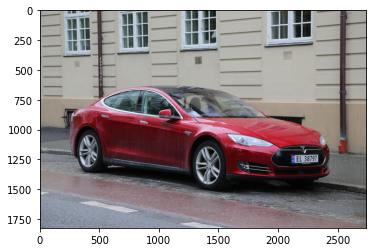

In [13]:
plt.imshow(img )
plt.show()

convering the image to gray color

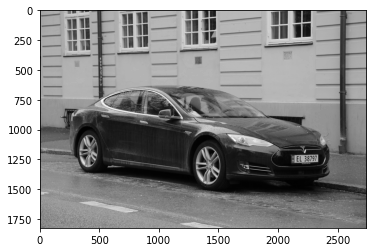

In [14]:
img_gray=color.rgb2gray(img)
plt.imshow(img_gray )
plt.show()

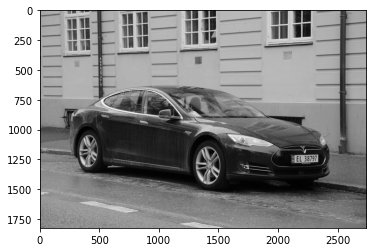

In [15]:
b=img @ [0.2126, 0.7152, 0.0722]
plt.imshow(b)

In [16]:
img_gray

array([[0.62379725, 0.62771882, 0.62379725, ..., 0.63529412, 0.64257176,
        0.64257176],
       [0.62379725, 0.62771882, 0.62379725, ..., 0.63556196, 0.63472863,
        0.63472863],
       [0.62296392, 0.62688549, 0.62771882, ..., 0.6310749 , 0.62715333,
        0.62715333],
       ...,
       [0.44996157, 0.44014627, 0.4748749 , ..., 0.41215686, 0.42      ,
        0.40823529],
       [0.41072314, 0.43033098, 0.49025569, ..., 0.40991686, 0.41215686,
        0.40431373],
       [0.39275137, 0.3770651 , 0.39807961, ..., 0.42196431, 0.41497725,
        0.40713412]])

In [17]:
# slicing
slice=img_gray[15:20,24:29]
Matrix(slice)

Matrix([
[0.652654901960784, 0.652654901960784, 0.656576470588235, 0.656576470588235, 0.656576470588235],
[0.652654901960784, 0.656576470588235, 0.656576470588235, 0.660498039215686, 0.660215294117647],
[0.656576470588235, 0.656576470588235, 0.656576470588235, 0.660498039215686, 0.660498039215686],
[0.654336470588235, 0.654336470588235, 0.654336470588235, 0.658258039215686, 0.658258039215686],
[0.654336470588235, 0.654336470588235, 0.654336470588235, 0.658258039215686, 0.658258039215686]])

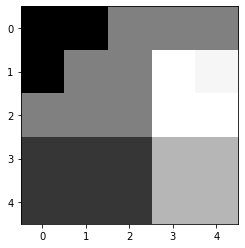

In [18]:
plt.imshow(slice)

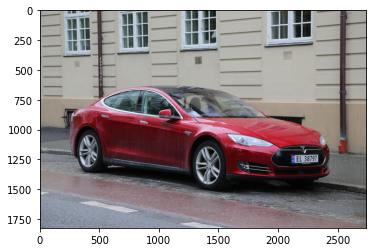

In [19]:
plt.imshow(img)

In [20]:
print(img_gray)

[[0.62379725 0.62771882 0.62379725 ... 0.63529412 0.64257176 0.64257176]
 [0.62379725 0.62771882 0.62379725 ... 0.63556196 0.63472863 0.63472863]
 [0.62296392 0.62688549 0.62771882 ... 0.6310749  0.62715333 0.62715333]
 ...
 [0.44996157 0.44014627 0.4748749  ... 0.41215686 0.42       0.40823529]
 [0.41072314 0.43033098 0.49025569 ... 0.40991686 0.41215686 0.40431373]
 [0.39275137 0.3770651  0.39807961 ... 0.42196431 0.41497725 0.40713412]]


In [21]:
img_gray.shape

(1824, 2736)

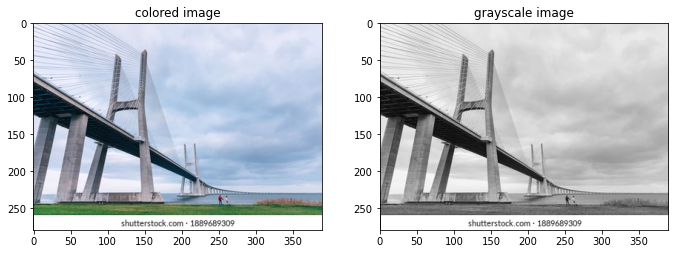

In [22]:
img=io.imread('../images/p1.jpg')
gray_img=color.rgb2gray(img)
plt.figure(figsize=(30,10))

plt.subplot(151),plt.imshow(img),plt.title('colored image')
plt.subplot(152),plt.imshow(gray_img),plt.title('grayscale image')
plt.show()

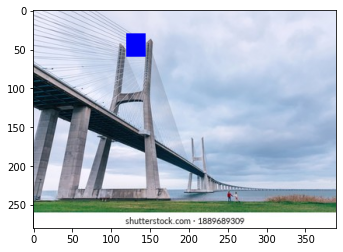

In [23]:
# grad values from row index: 30 to 60 and colum index: 120 to 145 and assign it a blue color
img[30:60,120:145]=(0,0,250)
plt.imshow(img)

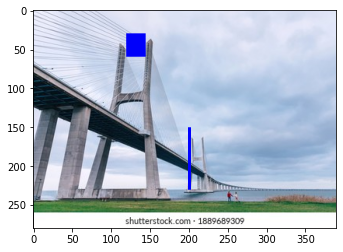

In [24]:
plt.imshow(img)
plt.vlines([200,200],150,230,colors='blue',linewidth=3)

You can convert images between different representations by using img_as_float, img_as_ubyte, etc.:

In [25]:
print(' values max/min',gray_img.max(),gray_img.min())
# convert the image data type from float64 to uint8
g=img_as_ubyte(gray_img)
print(g.dtype)
print(' values max/min',img_as_ubyte(gray_img).max(),img_as_ubyte(gray_img).min())

 values max/min 1.0 0.0
uint8
 values max/min 255 0


In [26]:
def Draw_H(img,cord=(20,20)):
    img1=img.copy()
    color=(0,250,250)
    rows,cols=cord
    h=img1[rows:rows+30,cols:cols+30]
    h[:,:3,:]=color
    h[:,-3:,:]=color
    h[14:16]=(25,250,0)
    return img1

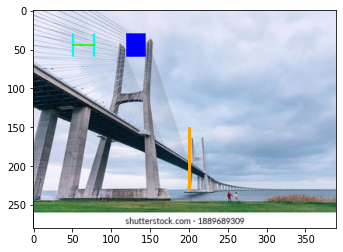

In [27]:
img1=Draw_H(img,cord=(30,50))
plt.imshow(img1)
plt.vlines([200,200],150,230,colors='orange',linewidth=3)

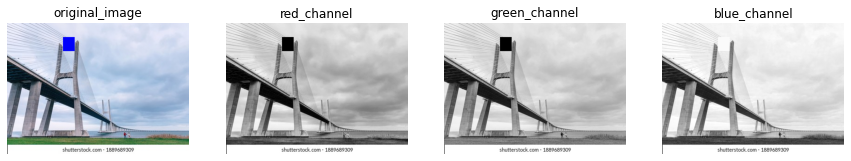

In [28]:
def plot_RGB(img):
    plt.figure(figsize=(15,15))
    r=img[:,:,0]
    g=img[:,:,1]
    b=img[:,:,2]
    ims=[img,r,g,b]
    title=['original_image','red_channel','green_channel','blue_channel']
    for i in range(4):
        plt.subplot(1,4,i+1)
        plt.imshow(ims[i])
        plt.title(title[i])
        plt.axis('off')
plot_RGB(img)

# PIXEL

An image consists of a set of pixels. a Pixels is the smallest unit of an image. we think of a pixel as the “color” or the “intensity” of light that appears in a given place in our image.


In [29]:
print(img.size)
print(190*266)

327600
50540


In [30]:
img.dtype

dtype('uint8')

# reading the image as colored image

In [31]:
cok=cv2.imread('../images/cok.jpeg',1)

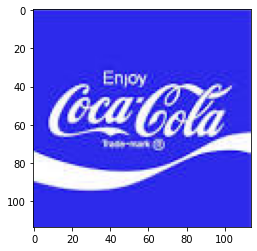

In [32]:
plt.imshow(cok)

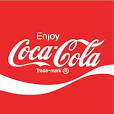

In [33]:
Image('../images/cok.jpeg')

matplotlib expect the iamge to be in RGB format whilst opencv uses BGR format thus for a proper display of the image we need to reverse the channel format which is done using the code below

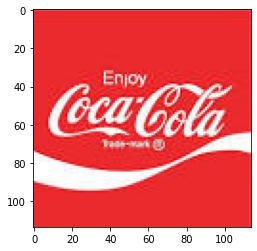

In [34]:
plt.imshow(cok[:,:,::-1])

In [35]:
cok.shape

(114, 114, 3)

note 3 is the number of channels

In [36]:

# total number of pixels
print(114*114* 3)
print(cok.size)

38988
38988


Opencv reads image in bgr format so the code below split the image into individual components and
merge them as rgb format a format used by matplotlib

In [37]:
b,g,r=cv2.split(cok)
merge=cv2.merge((r,g,b))

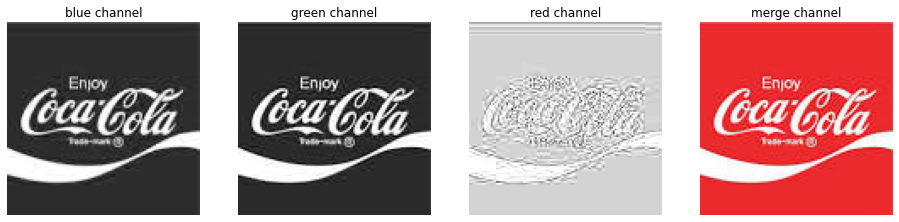

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(151);plt.imshow(b);plt.title('blue channel'),plt.axis('off')
plt.subplot(152);plt.imshow(g);plt.title('green channel'),plt.axis('off')
plt.subplot(153);plt.imshow(r);plt.title('red channel'),plt.axis('off')
plt.subplot(154);plt.imshow(merge);plt.title('merge channel'),plt.axis('off')

plt.show()

# OR

In [39]:
b=cok[:,:,0];g=cok[:,:,1]; r=cok[:,:,2]

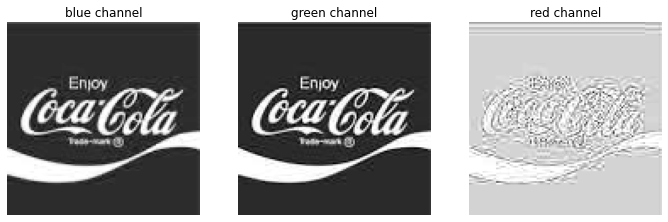

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(151);plt.imshow(b);plt.title('blue channel'),plt.axis('off')
plt.subplot(152);plt.imshow(g);plt.title('green channel'),plt.axis('off')
plt.subplot(153);plt.imshow(r);plt.title('red channel'),plt.axis('off')
plt.show()

In [41]:
cok1=cok.copy()

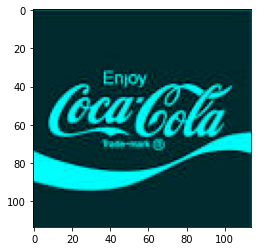

In [42]:
# setting the red pixels to zero
cok[:,:,2]=0
plt.imshow(cok[:,:,::-1])

# displaying image using opencv

# reading, displaying and saving image using opencv

# Drawing Functions in OpenCV 

# ANOTATING IMAGES
# Drawing a line
cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img

In [45]:
cok1=cok.copy()

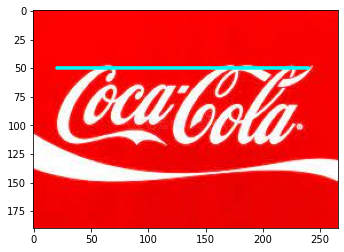

In [46]:
cv2.line(cok1, (20,50),(240,50),(250,250,0),2)
plt.imshow(cok1[:,:,::-1])

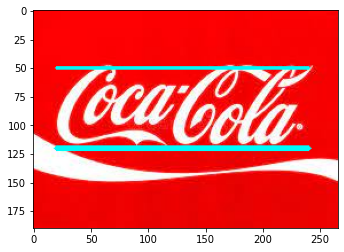

In [47]:
cv2.line(cok1, (20,120),(240,120),(250,250,0),3)
plt.imshow(cok1[:,:,::-1])

# DRAW CIRICLE

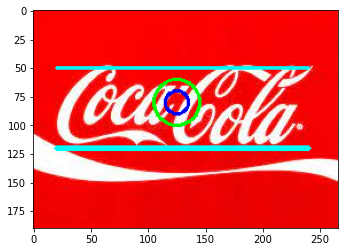

In [48]:
cv2.circle(cok1,(125,80),20,(0,250,0),2)
cv2.circle(cok1,(125,80),10,(250,0,0),2)
plt.imshow(cok1[:,:,::-1])

# reactangle

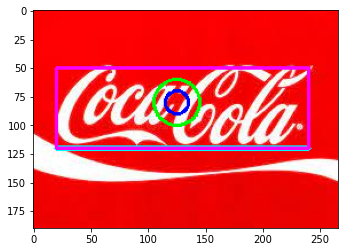

In [49]:
cv2.rectangle(cok1,(20,50),(240,120),(250,0,250),(2),lineType=cv2.LINE_8)
plt.imshow(cok1[:,:,::-1])
plt.show()

# Adding text to an image

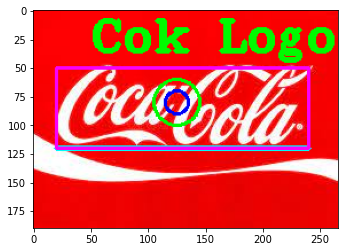

In [50]:
font_face=cv2.FONT_HERSHEY_COMPLEX_SMALL
font_scale=2
cv2.putText(cok1,'Cok Logo',(50,35),font_face,font_scale,(0,250,0),3 )
plt.imshow(cok1[:,:,::-1])

# EVENTS

In [51]:
event=[i for i in dir(cv2) if 'EVENT' in i]
print(event)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


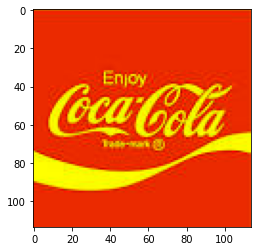

In [52]:
cok_in_bgr=cv2.imread('../images/cok.jpeg',cv2.IMREAD_COLOR)
# setting the blue channel to 0
cok_in_bgr[:,:,0]=0
cok_in_rgb=cok_in_bgr[:,:,::-1]
plt.imshow(cok_in_rgb)
plt.show()

# IMAGE CROPPING (REGION OF INTEREST)
image cropping is achieved by selecting a specific (pixel) region of the image

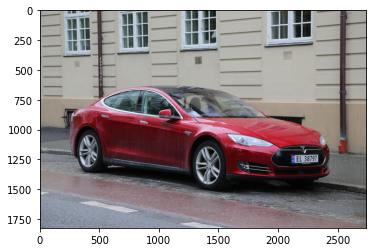

In [53]:
plt.imshow(car1)

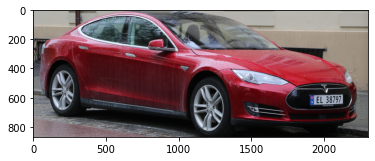

In [54]:
car=car1[630:1500,200:2500]
plt.imshow(car)

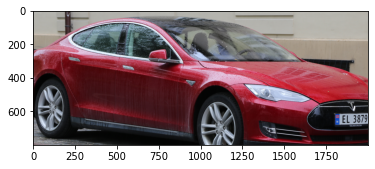

In [55]:
car=car1[600:1400,300:2300]
plt.imshow(car)

In [56]:
car=car1.copy()

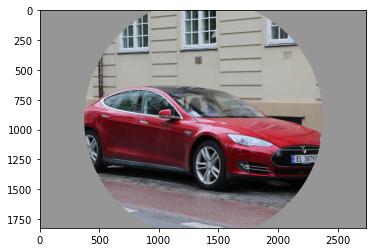

In [57]:
lx, ly = car.shape[0:2]
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2)**2  + (Y - ly / 2)**2  > lx * ly / 5
# Masks
car[mask] = 150
plt.imshow(car)

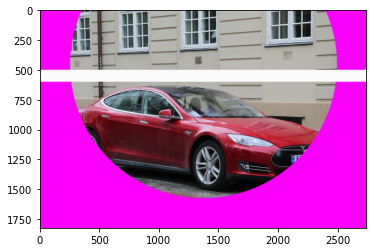

In [58]:
car=io.imread('../images/car.jpg')
lx, ly = car.shape[0:2]
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx/4)**2  + (Y - ly/2)**2 > lx * ly / 4
# Masks (white)
car[mask] = (250,0,250)
# white line
car[500:600] = 250
plt.imshow(car)

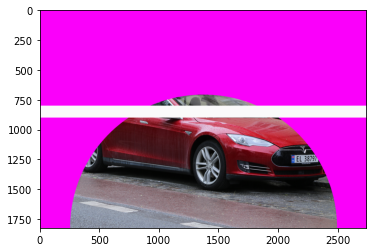

In [59]:
car=io.imread('../images/car.jpg')
lx, ly = car.shape[0:2]
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx)**2  + (Y - ly/2)**2 > lx * ly / 4
# Masks (white)
car[mask] = (250,0,250)
# white line
car[800:900] = 250
plt.imshow(car)

# flipped the image up or down

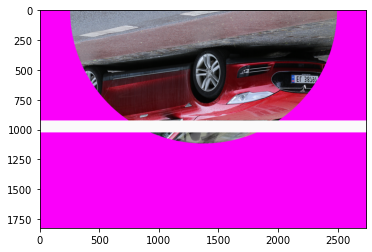

In [60]:
a=np.flipud(car)
plt.imshow(a)

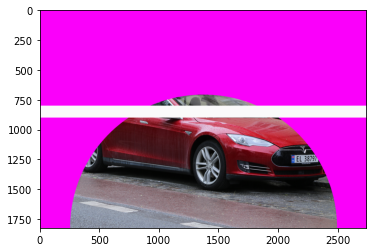

In [61]:
plt.imshow(np.flipud(a))

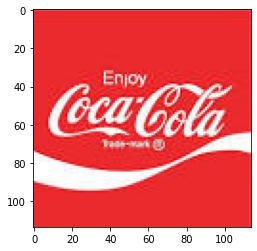

In [62]:
cok_in_bgr=cv2.imread('../images/cok.jpeg',cv2.IMREAD_COLOR)
cok_in_rgb=cok_in_bgr[:,:,::-1]
plt.imshow(cok_in_rgb)
plt.show()

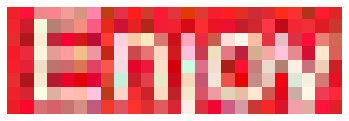

In [63]:
enjoy_region=cok_in_rgb[32:40,35:60]
plt.imshow(enjoy_region),plt.axis('off')
plt.show()

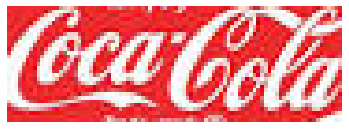

In [64]:
cok_region=cok_in_rgb[39:70,10:100]
plt.imshow(cok_region),plt.axis('off')
plt.show()

# Making Borders for Images (Padding)

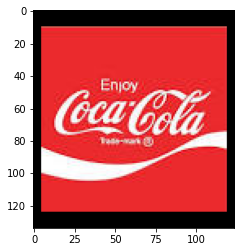

In [65]:
d=cv2.copyMakeBorder(cok_in_rgb,10,10,5,5,cv2.BORDER_CONSTANT)
plt.imshow(d)

(<matplotlib.image.AxesImage at 0x298c3026fd0>, (-0.5, 113.5, 138.5, -0.5))

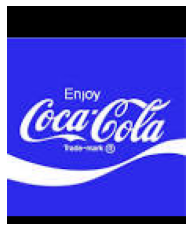

In [66]:
constant= cv2.copyMakeBorder(cok_in_rgb,20,5,0,0,cv2.BORDER_CONSTANT)
plt.imshow(constant[:,:,::-1]),plt.axis('off')

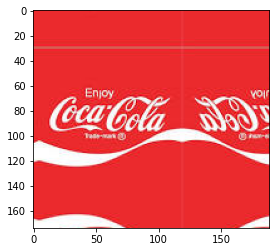

In [67]:
reflect=cv2.copyMakeBorder(cok_in_rgb,30,30,5,70,cv2.BORDER_REFLECT)
plt.imshow(reflect)

# Saving image
Use the function cv2.imwrite() to save an image

In [68]:
cok_in_bgr=cv2.imread('../images/cok.jpeg',cv2.IMREAD_COLOR)
b,g,r=cv2.split(cok_in_bgr)

In [69]:
cv2.imwrite('cok_gbr.png',cv2.merge((g,b,r)))
cv2.imwrite('cok_bbr.png',cv2.merge((b,b,r)))
cv2.imwrite('cok_bgr.png',cv2.merge((b,g,r)))
cok_rgb=cv2.imwrite('cok_rgb.png',cv2.merge((r,g,b)))

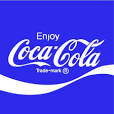

In [70]:
Image(filename='cok_rgb.png')

# Image Addition and subtraction
You can add two images by using OpenCV function cv2.add() or simply by numpy operation res = img1 + img2

In [71]:
car=cv2.imread('../images/car.jpg',cv2.IMREAD_COLOR)

In [72]:
img1=np.ones(car.shape,dtype=np.uint8)*50
added_img=cv2.add(car,img1)
sub_img=cv2.subtract(car,img1)

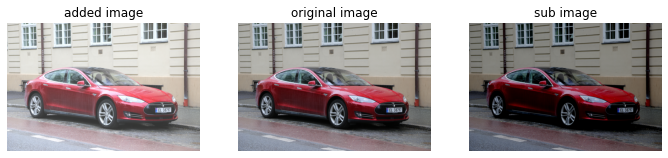

In [73]:
plt.figure(figsize=(20,10))
plt.subplot(151),plt.imshow(added_img[:,:,::-1]),plt.title('added image'),plt.axis('off')
plt.subplot(152),plt.imshow(car[:,:,::-1]),plt.title('original image'),plt.axis('off')
plt.subplot(153),plt.imshow(sub_img[:,:,::-1]),plt.title('sub image'),plt.axis('off')
plt.show()

# MULTIPLICATION OR CONTRASTION OF IMAGES

Contrast is the difference in the intensity Value of the pixels of an image.

In [74]:
matrix1=np.ones(car.shape,dtype=np.float64)*.50
matrix2=np.ones(car.shape,dtype=np.float64)*1.5

low_contrast=cv2.multiply(np.float64(car),matrix1)
high_contrast=cv2.multiply(np.float64(car),matrix2)

low_contrast=np.uint8(low_contrast)
high_contrast=np.uint8(high_contrast)

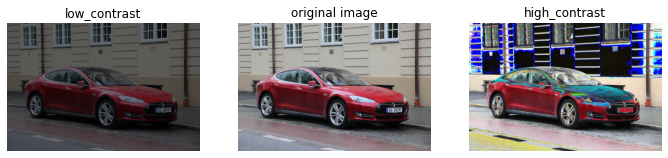

In [75]:
plt.figure(figsize=(20,10))
plt.subplot(151),plt.imshow(low_contrast[:,:,::-1]),plt.title('low_contrast'),plt.axis('off')
plt.subplot(152),plt.imshow(car[:,:,::-1]),plt.title('original image'),plt.axis('off')
plt.subplot(153),plt.imshow(high_contrast[:,:,::-1]),plt.title('high_contrast'),plt.axis('off')
plt.show()

In [76]:
high_contrast.max()

255

# handling overflowing values using np.clip
with the high contrast image some pixels values (where we high intensity like the blue color) are higher than 250

In [77]:
high_contrast=np.clip(cv2.multiply(np.float64(car),matrix2),0,250)
high_contrast=np.uint8(high_contrast)

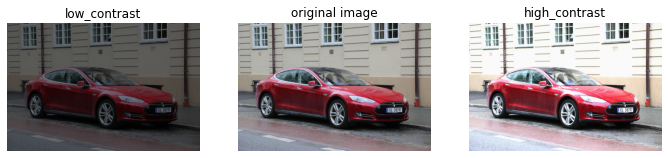

In [78]:
plt.figure(figsize=(20,10))
plt.subplot(151),plt.imshow(low_contrast[:,:,::-1]),plt.title('low_contrast'),plt.axis('off')
plt.subplot(152),plt.imshow(car[:,:,::-1]),plt.title('original image'),plt.axis('off')
plt.subplot(153),plt.imshow(high_contrast[:,:,::-1]),plt.title('high_contrast'),plt.axis('off')
plt.show()

# Bitwise Operations
This includes bitwise AND, OR, NOT and XOR operations

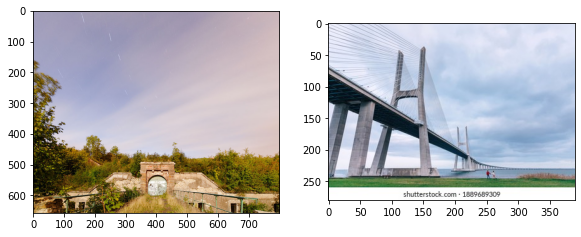

In [79]:
bush=cv2.imread('../images/p.jpg',cv2.IMREAD_COLOR)
bridge=cv2.imread('../images/p1.jpg',cv2.IMREAD_COLOR)
plt.figure(figsize=(15,10))
plt.subplot(131),plt.imshow(bush[:,:,::-1])
plt.subplot(132),plt.imshow(bridge[:,:,::-1])
plt.show()

In [80]:
print(bridge.shape)
print(bush.shape)

(280, 390, 3)
(657, 800, 3)


In [81]:
w=bridge.shape[0]
h=bridge.shape[1]

In [82]:
bush=cv2.resize(bush,(h,w),interpolation=cv2.INTER_AREA)

In [83]:
print(bridge.shape)
print(bush.shape)

(280, 390, 3)
(280, 390, 3)


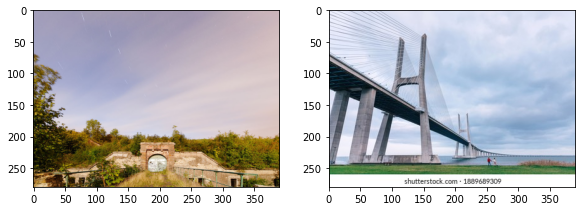

In [84]:
plt.figure(figsize=(15,10))
plt.subplot(131),plt.imshow(bush[:,:,::-1])
plt.subplot(132),plt.imshow(bridge[:,:,::-1])
plt.show()

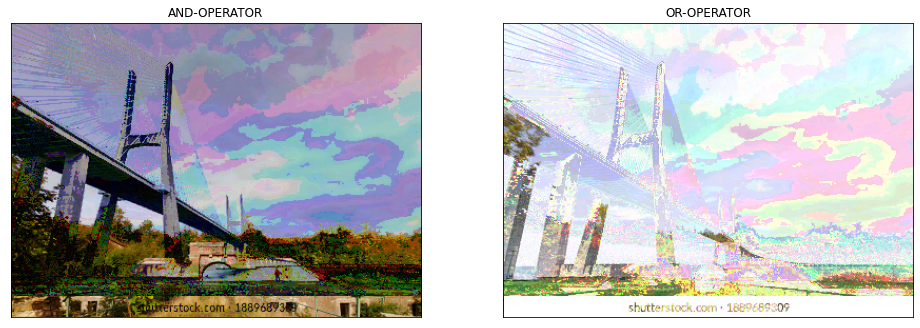

In [85]:
bit_and=cv2.bitwise_and(bush,bridge,mask=None)
bit_or=cv2.bitwise_or(bush,bridge,mask=None)

plt.figure(figsize=(25,20))
plt.subplot(132),plt.imshow(bit_and[:,:,::-1]),plt.title('AND-OPERATOR'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(bit_or[:,:,::-1]),plt.title('OR-OPERATOR'),plt.xticks([]),plt.yticks([])
plt.show()


# APPLICATIONS Of BITWISE OPERATION

# Mask allows us to focus only on the portions of the image that interests us

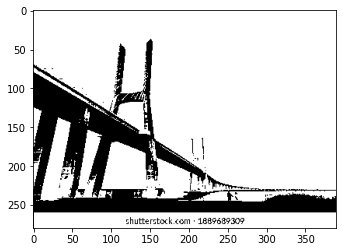

In [86]:
# i WANT TO USE THE IAMGE LABEL BUSH AS THE BACKGROUND IMAGE
bridge_rgb=cv2.cvtColor(bridge,cv2.COLOR_BGR2RGB)
gray_bridge=cv2.cvtColor(bridge_rgb,cv2.COLOR_BGR2GRAY)
ret,mask_img=cv2.threshold(gray_bridge,150,200,cv2.THRESH_BINARY)
plt.imshow(mask_img,cmap='gray')

In [87]:
mask_img.shape

(280, 390)

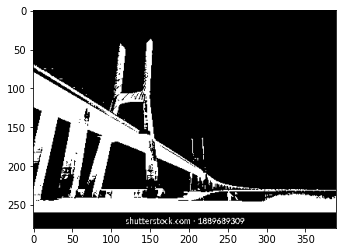

In [88]:
invent_mask=cv2.bitwise_not(mask_img)
plt.imshow(invent_mask,cmap='gray')

In [89]:
bush_rgb=cv2.cvtColor(bush,cv2.COLOR_BGR2RGB)

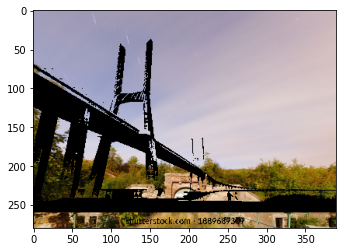

In [90]:
bush_bk=cv2.bitwise_and(bush_rgb,bush_rgb,mask=mask_img)
plt.imshow(bush_bk)

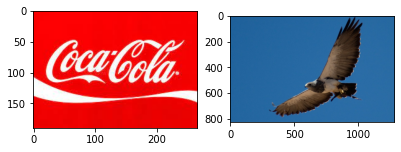

In [92]:
cok=cv2.imread('../images/cok1.jpeg')
bird=cv2.imread('../images/bird.jpg')
bird_rgd=cv2.cvtColor(bird,cv2.COLOR_BGR2RGB)
cok_rgb=cv2.cvtColor(cok,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))
plt.subplot(132),plt.imshow(cok_rgb)
plt.subplot(133),plt.imshow(bird_rgd)
plt.show()


In [93]:
print(cok_rgb.shape)
print(bird_rgd.shape)
cok_w=cok_rgb.shape[0]
cok_l=cok_rgb.shape[1]

(190, 266, 3)
(831, 1280, 3)


In [94]:
bird_rgd=cv2.resize(bird_rgd,(cok_l,cok_w),interpolation=cv2.INTER_AREA)
bird_rgd.shape

(190, 266, 3)

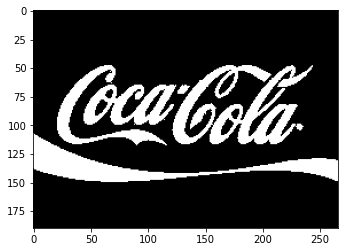

In [95]:
gray_cok=cv2.cvtColor(cok_rgb,cv2.COLOR_RGB2GRAY)
ret,mask=cv2.threshold(gray_cok,120,255,cv2.THRESH_BINARY)
plt.imshow(mask,cmap='gray')

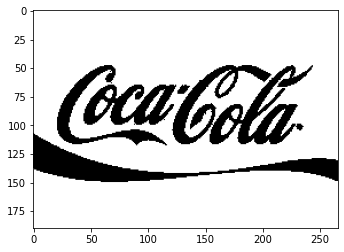

In [96]:
invent_mask_cok=cv2.bitwise_not(mask)
plt.imshow(invent_mask_cok,cmap='gray')

# APPLY BACKGROUND ON MASK

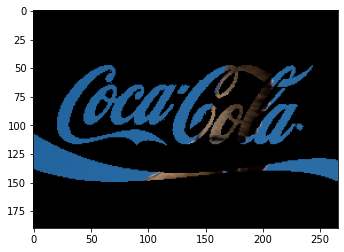

In [97]:
back_gk=cv2.bitwise_and(bird_rgd,bird_rgd,mask=mask)
plt.imshow(back_gk)

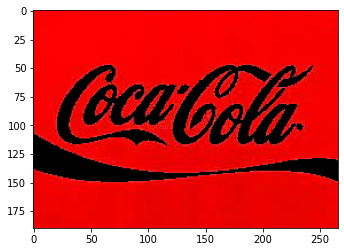

In [98]:
front_gk=cv2.bitwise_and(cok_rgb,cok_rgb,mask=invent_mask_cok)
plt.imshow(front_gk)

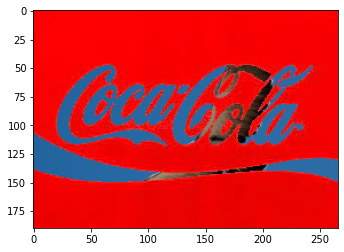

In [99]:
img_ad=cv2.add(back_gk,front_gk)
plt.imshow(img_ad)

# Performance Measurement and Improvement Techniques  43 (47 / 273)

In [100]:
%timeit img1 = cv2.imread('../images/cok1.jpeg')


1.16 ms ± 85.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


 many of OpenCV functions are optimized. we can use cv2.useOptimized() to check if it is enabled/disabled

In [101]:
cv2.useOptimized()

True